# PDE testing

In [12]:
from pde import Tag
from pde import Model
from pde import Simulation
import control

In [13]:
from models.distillation_models import WoodBerry

In [14]:
wood_berry = WoodBerry()
wood_berry

Model name: Wood Berry Distillation Model

Input 1 to output 1:
    -12.8 s + 25.6
---------------------
16.7 s^2 + 34.4 s + 2

Input 1 to output 2:
      -6.6 s + 1.886
---------------------------
10.9 s^2 + 4.114 s + 0.2857

Input 2 to output 1:
    18.9 s - 12.6
----------------------
21 s^2 + 15 s + 0.6667

Input 2 to output 2:
      19.4 s - 12.93
--------------------------
14.4 s^2 + 10.6 s + 0.6667

Input 3 to output 1:
      -3.8 s + 0.95
-------------------------
14.9 s^2 + 4.725 s + 0.25

Input 3 to output 2:
      -4.9 s + 3.267
-------------------------
13.2 s^2 + 9.8 s + 0.6667

## Inputs and Ouputs

In [4]:
R = Tag('Reflux', 'Reflux flow rate', IOtype='INPUT')
S = Tag('Steam', 'Steam flow rate', IOtype='INPUT')
F = Tag('Feed', 'Feed flow rate', IOtype='INPUT')

xD = Tag('x_D', 'Distillate purity', IOtype='OUTPUT')
xB = Tag('x_B', 'Bottoms purity', IOtype='OUTPUT')

## Wood-Berry Distillation Column
Transfer function matrix representation
http://nbviewer.jupyter.org/github/OpenChemE/CHBE356/blob/master/Notebooks/5.%20Advanced%20Process%20Control/Building%20MIMO%20systems.ipynb

In [5]:
g_tf = control.tf([12.8], [16.7,1])
td = 1
g_delay = control.tf(control.pade(td,1)[0],control.pade(td,1)[1])
g11 = g_tf*g_delay

g_tf = control.tf([-18.9], [21.0,1])
td = 3
g_delay = control.tf(control.pade(td,1)[0],control.pade(td,1)[1])
g12 = g_tf*g_delay

g_tf = control.tf([6.6], [10.9,1])
td = 7
g_delay = control.tf(control.pade(td,1)[0],control.pade(td,1)[1])
g21 = g_tf*g_delay

g_tf = control.tf([-19.4], [14.4,1])
td = 3
g_delay = control.tf(control.pade(td,1)[0],control.pade(td,1)[1])
g22 = g_tf*g_delay

g_tf = control.tf([3.8], [14.9,1])
td = 8
g_delay = control.tf(control.pade(td,1)[0],control.pade(td,1)[1])
g1f = g_tf*g_delay

g_tf = control.tf([4.9], [13.2,1])
td = 3
g_delay = control.tf(control.pade(td,1)[0],control.pade(td,1)[1])
g2f = g_tf*g_delay

row_1_num = [x[0][0] for x in (g11.num, g12.num, g1f.num)]
row_2_num = [x[0][0] for x in (g21.num, g22.num, g2f.num)]

row_1_den = [x[0][0] for x in (g11.den, g12.den, g1f.den)]
row_2_den = [x[0][0] for x in (g21.den, g22.den, g2f.den)]

sys = control.tf([row_1_num,row_2_num],[row_1_den,row_2_den])

## Define Model

In [6]:
inputs = {'R':R,'S':S,'F':F}
outputs = {'xD':xD,'xB':xB}
wood_berry = Model(sys, "Wood Berry Distillation Model", inputs, outputs)
wood_berry

System: 
 
Input 1 to output 1:
    -12.8 s + 25.6
---------------------
16.7 s^2 + 34.4 s + 2

Input 1 to output 2:
      -6.6 s + 1.886
---------------------------
10.9 s^2 + 4.114 s + 0.2857

Input 2 to output 1:
    18.9 s - 12.6
----------------------
21 s^2 + 15 s + 0.6667

Input 2 to output 2:
      19.4 s - 12.93
--------------------------
14.4 s^2 + 10.6 s + 0.6667

Input 3 to output 1:
      -3.8 s + 0.95
-------------------------
14.9 s^2 + 4.725 s + 0.25

Input 3 to output 2:
      -4.9 s + 3.267
-------------------------
13.2 s^2 + 9.8 s + 0.6667

## Initialize simulation

In [15]:
distillation = Simulation(wood_berry, uid='0')

Simulation #0 created. Call activate() to activate


In [16]:
distillation.activate()

Simulation #0 activated. Ready to simulate


## Run and store

In [17]:
dictionary = distillation.step()
dictionary['xD']

0.0

In [18]:
store_xD, store_xB = [], []
for i in range(100):
    if (i % 25): distillation.updateTag({'R': i/10, 'S': i/10})
    results = distillation.step()
    store_xD.append(results['xD'])
    store_xB.append(results['xB'])

Updated R to: 0.1
Updated S to: 0.1
Updated R to: 0.2
Updated S to: 0.2
Updated R to: 0.3
Updated S to: 0.3
Updated R to: 0.4
Updated S to: 0.4
Updated R to: 0.5
Updated S to: 0.5
Updated R to: 0.6
Updated S to: 0.6
Updated R to: 0.7
Updated S to: 0.7
Updated R to: 0.8
Updated S to: 0.8
Updated R to: 0.9
Updated S to: 0.9
Updated R to: 1.0
Updated S to: 1.0
Updated R to: 1.1
Updated S to: 1.1
Updated R to: 1.2
Updated S to: 1.2
Updated R to: 1.3
Updated S to: 1.3
Updated R to: 1.4
Updated S to: 1.4
Updated R to: 1.5
Updated S to: 1.5
Updated R to: 1.6
Updated S to: 1.6
Updated R to: 1.7
Updated S to: 1.7
Updated R to: 1.8
Updated S to: 1.8
Updated R to: 1.9
Updated S to: 1.9
Updated R to: 2.0
Updated S to: 2.0
Updated R to: 2.1
Updated S to: 2.1
Updated R to: 2.2
Updated S to: 2.2
Updated R to: 2.3
Updated S to: 2.3
Updated R to: 2.4
Updated S to: 2.4
Updated R to: 2.6
Updated S to: 2.6
Updated R to: 2.7
Updated S to: 2.7
Updated R to: 2.8
Updated S to: 2.8
Updated R to: 2.9
Updated S 

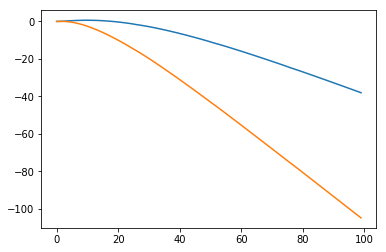

In [11]:
import matplotlib.pyplot as plt
plt.plot(store_xD)
plt.plot(store_xB)
plt.show()